In [1]:
import pickle
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
exp_path = "/Volumes/SanDisk_2T/MeDIL/data/experiments"
sns.set()

In [2]:
def get_losses(graph): 
    
    loss_train_old = np.zeros(200)
    loss_valid_old = np.zeros(200)
    for i in range(10):
        file = os.path.join(exp_path, f"experiment_{i}", f"Graph_{graph}", "error_true.pkl")
        with open(file, "rb") as f:
            loss_true = pickle.load(f)
            loss_train = loss_true[0]
            loss_valid = loss_true[1]
        loss_train_old += loss_train
        loss_valid_old += loss_valid
    loss_train_old /= 10
    loss_valid_old /= 10
    
    return loss_train_old, loss_valid_old

In [3]:
def get_distance(graph): 
    
    sfd, ushd = 0, 0
    for i in range(10):
        biadj_mat = np.load(os.path.join(exp_path, f"experiment_{i}", f"Graph_{graph}", "biadj_mat.npy"))
        biadj_mat_recon = np.load(os.path.join(exp_path, f"experiment_{i}", f"Graph_{graph}", "biadj_mat_recon.npy"))
        sfd_, ushd_ = analysis(biadj_mat, biadj_mat_recon)
        sfd += sfd_
        ushd += ushd_
    sfd /= 10
    ushd /= 10
    
    return sfd, ushd

## Graph_a

In [44]:
loss_train_loss, loss_valid_loss = get_losses("a")

Text(0, 0.5, 'Loss')

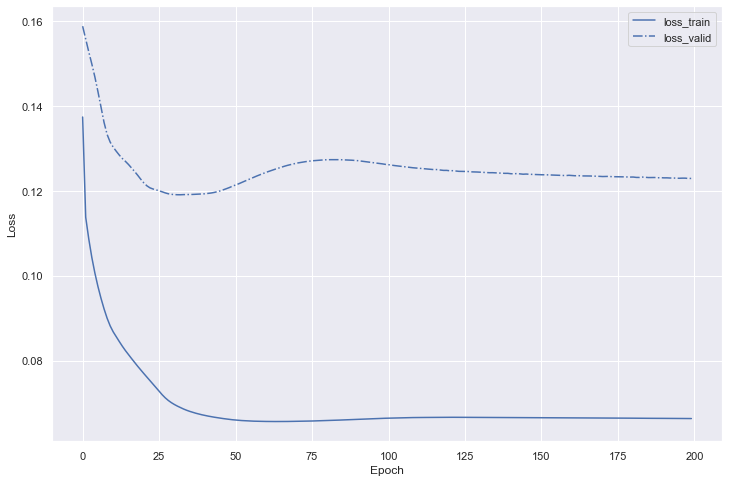

In [45]:
fig, ax = plt.subplots(1, 1, figsize = (12, 8))
ax.plot(loss_train_loss, "-b", label="loss_train")
ax.plot(loss_valid_loss, "-.b", label="loss_valid")
ax.legend()
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")

In [38]:
sfd, ushd = get_distance("i")
print(f"The averaged SFD={sfd}, USHD={ushd} across the 10 experiments")

The averaged SFD=8.9, USHD=1.5 across the 10 experiments
